# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
import datetime
from scipy import optimize
import os
import geopandas as gpd
from geopandas import GeoSeries
%matplotlib inline

# Order 870 - NO NEED TO RUN

In [25]:
TAZ2cell = pd.read_excel('../Data/division_choice/870/taz2cell.xlsx')
TAZ2cell = TAZ2cell[['cell_id', 'cell_name']].drop_duplicates()

In [32]:
TAZ2cell.reset_index(inplace=True)
TAZ2cell = TAZ2cell[['cell_id', 'cell_name']]
TAZ2cell.to_excel('../Data/division_choice/870/cell2name.xlsx')

# Consts

In [39]:
cell_name = '250'

# Load Data

In [34]:
TAZs = gpd.read_file('../Data/GIS/2630_TAZ_POLY_only/2630_TAZ_POLY_only.shp')

In [35]:
TAZs.sort_values(by='ID')

,ID,ID_1250,geometry
1350,1,100001,"POLYGON ((35.03563 31.86695, 35.03335 31.85942..."
1535,2,100012,"POLYGON ((34.79271 32.09945, 34.79276 32.09926..."
1720,3,100003,"POLYGON ((34.77363 32.10991, 34.78031 32.10606..."
1906,4,100003,"POLYGON ((34.77363 32.10991, 34.77924 32.11963..."
2090,5,100004,"POLYGON ((34.78652 32.14003, 34.78785 32.14541..."
...,...,...,...
2613,2626,101247,"POLYGON ((34.76564 31.39262, 34.76455 31.39282..."
1823,2627,101248,"POLYGON ((34.75835 31.39331, 34.75983 31.39272..."
2612,2628,101249,"POLYGON ((34.76616 31.39020, 34.76617 31.39024..."
2617,2629,101250,"POLYGON ((34.94141 29.55483, 34.94506 29.55499..."


In [40]:
TAZ2cell = pd.read_excel('../Data/division_choice/' + cell_name +'/taz2cell.xlsx')
TAZ2cell

,taz_id,cell_id
0,1,2000153
1,2,2000166
2,3,2000164
3,4,2000164
4,5,2000164
...,...,...
2625,2626,2000228
2626,2627,2000228
2627,2628,2000228
2628,2629,2000229


In [41]:
TAZ2cell_geo = TAZs.merge(TAZ2cell, right_on='taz_id', left_on='ID')[['taz_id', 'geometry', 'cell_id']]

In [42]:
cell_geo = TAZ2cell_geo.groupby(by='cell_id').apply(lambda f: GeoSeries(f['geometry']).unary_union)

In [43]:
cell_geo = cell_geo.reset_index()

In [44]:
cell_geo.columns = ['cell_id', 'geometry']

In [45]:
cell_geo

,cell_id,geometry
0,2000001,"POLYGON ((35.24309399999994 31.72010399999995,..."
1,2000002,"POLYGON ((35.23375999999995 31.82261600000011,..."
2,2000003,"POLYGON ((35.25871299999994 31.79762700000008,..."
3,2000004,"POLYGON ((35.23298299999995 31.78301500000007,..."
4,2000005,"POLYGON ((35.23515599999994 31.77527900000004,..."
...,...,...
245,2000246,"POLYGON ((34.88107600000006 31.39616199999949,..."
246,2000247,"POLYGON ((35.28773299999993 32.04537000000043,..."
247,2000248,"POLYGON ((35.12674099999998 32.1666940000006, ..."
248,2000249,"POLYGON ((35.040243 32.12549100000055, 35.0484..."


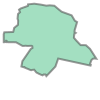

In [46]:
cell_geo['geometry'].iloc[230]

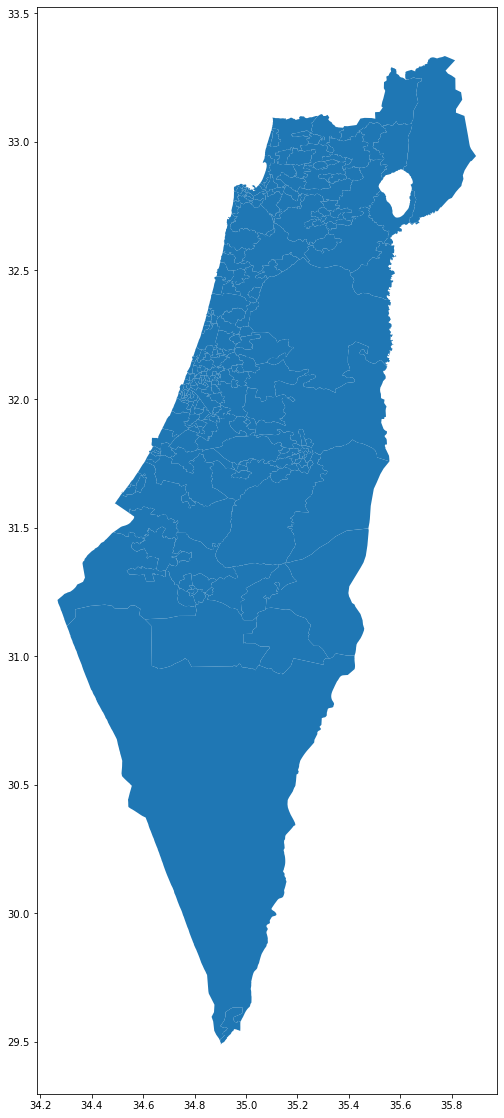

In [47]:
cell_geo = gpd.GeoDataFrame(cell_geo)

cell_geo.plot(figsize=(10,20))

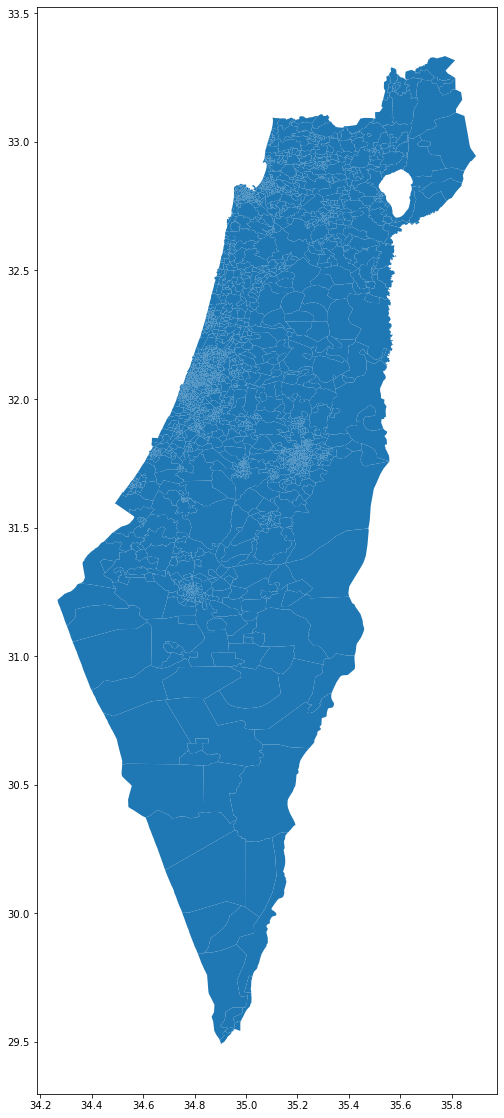

In [48]:
TAZs.plot(figsize=(10,20))

In [50]:
cell_names = pd.read_excel('../Data/division_choice/' + cell_name +'/cell2name.xlsx')
cell_names[['cell_id', 'cell_name']]
cell_names

,cell_id,cell_name
0,2000001,חומת שמואל ובית צפאפא
1,2000002,אזור תעשייה עטרות
2,2000003,שועפט
3,2000004,ואדי ג'וז- ירושלים
4,2000005,העיר העתיקה ירושלים
...,...,...
245,2000246,חברון מ.א גוש עציון
246,2000247,צפון השומרון
247,2000248,קלקיליה וקרני שומרון
248,2000249,אורנית


In [51]:
cell_geo = cell_geo.merge(cell_names, on='cell_id')[['cell_id', 'cell_name', 'geometry']]

In [52]:
cell_geo

,cell_id,cell_name,geometry
0,2000001,חומת שמואל ובית צפאפא,"POLYGON ((35.24309 31.72010, 35.24243 31.71954..."
1,2000002,אזור תעשייה עטרות,"POLYGON ((35.23376 31.82262, 35.23309 31.82143..."
2,2000003,שועפט,"POLYGON ((35.25871 31.79763, 35.25901 31.79571..."
3,2000004,ואדי ג'וז- ירושלים,"POLYGON ((35.23298 31.78302, 35.23297 31.78295..."
4,2000005,העיר העתיקה ירושלים,"POLYGON ((35.23516 31.77528, 35.23511 31.77516..."
...,...,...,...
245,2000246,חברון מ.א גוש עציון,"POLYGON ((34.88108 31.39616, 34.88338 31.40188..."
246,2000247,צפון השומרון,"POLYGON ((35.28773 32.04537, 35.28409 32.04412..."
247,2000248,קלקיליה וקרני שומרון,"POLYGON ((35.12674 32.16669, 35.12506 32.16164..."
248,2000249,אורנית,"POLYGON ((35.04024 32.12549, 35.04843 32.12437..."


In [56]:
import os
os.mkdir('../Data/GIS/'+ cell_name + '_poly')
cell_geo.to_file('../Data/GIS/'+ cell_name + '_poly/' +cell_name + '_poly.shp')